In [4]:
conda install -c conda-forge wordcloud

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\hp\anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2021.11  |           py39_0           7 KB
    anaconda-custom            |           py39_1           4 KB
    ca-certificates-2021.10.8  |       h5b45459_0         176 KB  conda-forge
    certifi-2021.10.8          |   py39hcbf5309_1         145 KB  conda-forge
    click-8.0.4                |   py39hcbf5309_0         147 KB  conda-forge
    conda-4.11.0               |   py39hcbf5309_0        16.8 MB  conda-forge
    openssl-1.1.1l             |       h8ffe710_0         5.7 MB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    wordcloud-1.8.1            |   py39hb82d6ee_2         196 KB  conda-forge
    -------------------------


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2021.11=py39_0
  - defaults/noarch::black==19.10b0=py_0
  - defaults/noarch::conda-verify==3.4.2=py_1
  - defaults/noarch::cookiecutter==1.7.2=pyhd3eb1b0_0
  - defaults/noarch::dask==2021.10.0=pyhd3eb1b0_0
  - defaults/win-64::distributed==2021.10.0=py39haa95532_0
  - defaults/noarch::flask==1.1.2=pyhd3eb1b0_0
  - defaults/noarch::nltk==3.6.5=pyhd3eb1b0_0
  - defaults/noarch::python-lsp-black==1.0.0=pyhd3eb1b0_0
  - defaults/win-64::spyder==5.1.5=py39haa95532_1


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda





The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2021.10.26~ --> conda-forge::ca-certificates-2021.10.8-h5b45459_0
  openssl              pkgs/main::openssl-1.1.1l-h2bbff1b_0 --> conda-forge::openssl-1.1.1l-h8ffe710_0

The following packages will be DOWNGRADED:

  anaconda                                   2021.11-py39_0 --> custom-py39_1




openssl-1.1.1l       | 5.7 MB    |            |   0% 
openssl-1.1.1l       | 5.7 MB    |            |   0% 
openssl-1.1.1l       | 5.7 MB    | 1          |   2% 
openssl-1.1.1l       | 5.7 MB    | 4          |   5% 
openssl-1.1.1l       | 5.7 MB    | 9          |  10% 
openssl-1.1.1l       | 5.7 MB    | #2         |  13% 
openssl-1.1.1l       | 5.7 MB    | #9         |  20% 
openssl-1.1.1l       | 5.7 MB    | ##4        |  24% 
openssl-1.1.1l       | 5.7 MB    | ##7        |  28% 
openssl-1.1.1l       | 5.7 MB    | ###1       |  31% 
openssl-1.1.1l       | 5.7 MB    | ###4   

In [5]:
import requests # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content
import re # regular expressions

In [6]:
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [7]:
# creating empty reviews list 
kindle_reviews =[]
#forest = ["the","king","of","jungle"]

In [8]:
for i in range(1,20):
  ip=[]  
  #url="https://www.amazon.in/Apple-MacBook-Air-13-3-inch-Integrated/product-reviews/B073Q5R6VR/ref=cm_cr_arp_d_paging_btm_2?showViewpoints=1&pageNumber="+str(i)
  url = "https://www.amazon.in/All-New-Kindle-reader-Glare-Free-Touchscreen/product-reviews/B0186FF45G/ref=cm_cr_getr_d_paging_btm_3?showViewpoints=1&pageNumber="+str(i)
  response = requests.get(url)
  soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
  reviews = soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
  # Extracting the content under specific tags  
# Extracting the content under specific tags    
for i in range(len(reviews)):
    ip.append(reviews[i].text)  
kindle_reviews=kindle_reviews+ip   # adding the reviews of one page to empty list which in future contains all the reviews

In [9]:
# writng reviews in a text file 
#with open("iphone.txt","w",encoding='utf8') as output:
#    for i in iphone_reviews:
#        output.write(i+"\n\n")
#    #output.write(str(iphone_reviews))    
# Joinining all the reviews into single paragraph

In [10]:
ip_rev_string = " ".join(kindle_reviews)

In [11]:
# Removing unwanted symbols incase if exists
ip_rev_string = re.sub("[^A-Za-z" "]+"," ",ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ",ip_rev_string)

In [12]:
# words that contained in iphone 7 reviews
ip_reviews_words = ip_rev_string.split(" ")

In [14]:
#stop_words = stopwords.words('english')
with open('stop.txt','r')as sw:
    stopwords = sw.read()
stopwords = stopwords.split("\n")

In [15]:
#stp_wrds = stopwords+stop_words
temp = ["this","is","awsome","Data","Science"]
[i for i in temp if i not in "is"]
ip_reviews_words = [w for w in ip_reviews_words if not w in stopwords]

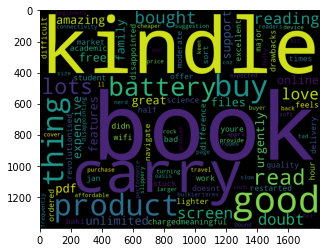

In [16]:
# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(ip_reviews_words)
# WordCloud can be performed on the string inputs. That is the reason we have combined 
# entire reviews into single paragraph
# Simple word cloud
wordcloud_ip = WordCloud(background_color='black',width=1800,height=1400).generate(ip_rev_string)
plt.imshow(wordcloud_ip)

In [17]:
# positive words # Choose the path for +ve words stored in system
with open('positive-words.txt','r')as pos:
     poswords = pos.read().split("\n")  
poswords = poswords[36:]

In [18]:
# negative words  Choose path for -ve words stored in system
with open('negative-words.txt','r') as neg:
  negwords = neg.read().split("\n")
negwords = negwords[37:]

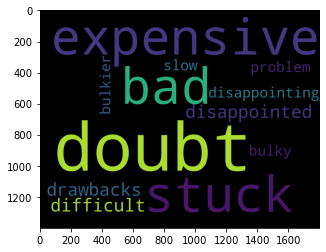

In [19]:
# negative word cloud
# Choosing the only words which are present in negwords
ip_neg_in_neg = " ".join ([w for w in ip_reviews_words if w in negwords])
wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_neg_in_neg)
plt.imshow(wordcloud_neg_in_neg)

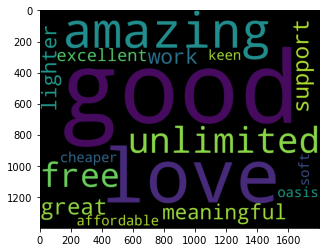

In [20]:
# Positive word cloud
# Choosing the only words which are present in positive words
ip_pos_in_pos = " ".join ([w for w in ip_reviews_words if w in poswords])
wordcloud_pos_in_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_pos_in_pos)
plt.imshow(wordcloud_pos_in_pos)